**Moving Average Model**  
_The moving-average model (MA model), also known as "moving-average process", is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term._

_Together with the autoregressive (AR) model, the moving-average model is a special case and key component of the more general ARMA and ARIMA models of time series, which have a more complicated stochastic structure._

_The moving-average model should not be confused with the moving average, a distinct concept despite some similarities. Contrary to the AR model, **the finite MA model is always stationary**._  


_So, suppose you have already found out the prediction using any of these (Persistence and AutoRegression)methods.  
__Equation :__ ```y = yhat +  Residuals```   
               
       where, y = Actual values  
           yhat = Predicted values  
       Residual = (y - yhat) or forecating error._   

_Ideally,and these residuals should be white noise which means there should not be any information left .But practically, this may not always happen.Our model may leave some information in the residuals, to extract that information and improve to our forecast.We run a forecasting model on residuals.We tried to forecast the future residuals._

_First level model was on the actual time series and we found residuals from that. Second level model was on residuals obtained from the first model.So if there is any pattern in the residuals, second level model will identify it and capture that information in the forecast of residues.We can then add back these forecasted residuals to our original forecast to get better forecast.This is the concept of moving average._

_**Steps that are used in Moving Average Model**_
- step-1 : Building a forecasting model(AR or Persistence).
- step-2 : Find residual/Forecast error.
- step-3 : Build a forecast model on residuals.
- step-4 : Use Forecasted residuals to update the initial forecast.  
 * If initial forecasting model is AR model, this technique is also called **_ARMA_**.

### _Import Libraries and Load the data_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
from google.colab import files
upload = files.upload()

Saving daily-min-temperatures.csv to daily-min-temperatures (2).csv


In [3]:
data = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

In [4]:
data.head() #First Five rows of the data

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
data['t'] =  data['Temp'].shift(1)

In [6]:
data['Resid'] = data['Temp'] - data['t']

In [7]:
data.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [8]:
train, test = data[1:data.shape[0]-7], data[data.shape[0]-7:]

In [9]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

### _Splitting the data into train and test_

_We can develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as “unseen” data that we wish to predict._

In [10]:
train, test = data.Resid[1:data.shape[0]-7], data.Resid[data.shape[0]-7:]

In [11]:
print(train.shape)
print(test.shape)

(3642,)
(7,)


In [12]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [13]:
from statsmodels.tsa.ar_model import AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### _AR Model Defining_

In [14]:
model = AR(train)
model_fit = model.fit()

In [15]:
model_fit.k_ar

29

In [16]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

### _Making Predictions_

In [17]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [18]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [19]:
data.t[data.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [20]:
predictions = data.t[data.shape[0]-7:] + pred_resid

In [21]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

### _Evaluation_

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648207

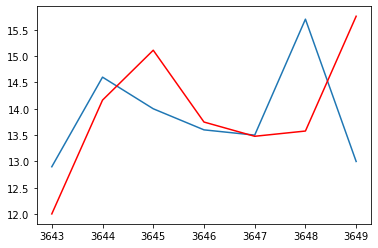

In [23]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')